In [12]:
import numpy as np
import scipy
import scipy.linalg 
import matplotlib.pyplot as plt 

%matplotlib inline

***** LU decomposition <br>
2x + 5y = 21 <br>
x + 2y = 8 <br>
*******
x1 + x2 + x3 = 1 <br>
4x1 + 3x2 - x3 = 6 <br>
3x1 + 5x2 + 3x3 = 4 <br>

***** jacobi and gauess sidel part <br>
5x1 -2x2 + 3x3 = -1 <br>
-3x1 + 9x2 + x3 = 2 <br>
2x1 -x2 -7x3 = 3 <br>

### LU Decomposition

In [2]:
####### implementing LU Decomposition to solve system of linear equations

def reduce_row(mat, pivot, mode = 'ref'):
    '''
    perfroms row reduction to matrix mat and put it in the ref format or in rref format
    
    parameter:
        mat : square matrix shape (n,n) dtype = float
        pivot: list [pivot row, pivot column
        mode: str ('ref','rref', 'full_reduction' ) defalut 'ref' 
              it determines wheter to reduce the matrix to ref format or rref according to certain pivot element
              if 'full_reduction' it will return a all the matrix in the in rref  
    returns:
        it does its work in place
    '''
    pivot_row = pivot[0]
    pivot_col = pivot[1]
    factors = np.eye(mat.shape[0])
    
    # to overcome if the pivot elemnt is 0 swap with another row 
    if mode != 'full_reduction' and pivot_row < mat.shape[0]-1:

        swap_row_idx = -1
        while mat[pivot_row, pivot_col] == 0:
            mat[pivot_row],mat[swap_row_idx] = mat[swap_row_idx] , mat[pivot_row]
            swap_row_idx -= 1

    
    if mode == 'ref':  

        for i in range(pivot_row + 1,mat.shape[0]):
            factor = (mat[i,pivot_col] / mat[pivot_row, pivot_col])
            mat[i,:] = mat[i] - factor * mat[pivot_row]
            factors[i,pivot_col] = factor

        return factors[:,pivot_col]
    
    elif mode == 'rref':

        mat[pivot_row] = mat[pivot_row] / mat[pivot_row, pivot_col]
        for i in range(pivot_row + 1,mat.shape[0]):
            factor = (mat[i,pivot_col] / mat[pivot_row, pivot_col])
            mat[i] = mat[i] - (factor *mat[pivot_row])
           
            factors[i,pivot_col] = factor
        
        # reducing elements above the pivot
        for j in range(pivot_row):
            f = mat[j, pivot_col] / mat[pivot_row, pivot_col]  
            mat[j] = mat[j] - (f * mat[pivot_row]) 
        
        return mat
    
    elif mode == 'full_reduction':
        
        pivot_row = 0
        pivot_col = 0
        
        # take care of zero pivots by swapping the row 
        # reducing the matrix by gauess jordan eleimination
        while pivot_row < mat.shape[0]:
            swap_row_idx = -1
            while mat[pivot_row, pivot_col] == 0 and pivot_row != mat.shape[0]-1:
                # print('hi')
                mat[pivot_row],mat[swap_row_idx] = mat[swap_row_idx] , mat[pivot_row]
                swap_row_idx -= 1
        
            mat[pivot_row] = mat[pivot_row] / mat[pivot_row, pivot_col]
            
            for i in range(pivot_row + 1,mat.shape[0]):
                # print('hi')
                factor = (mat[i,pivot_col] / mat[pivot_row, pivot_col])
                mat[i] = mat[i] - (factor *mat[pivot_row])
                factors[i,pivot_col] = factor

            for j in range(pivot_row):
                # print('hi')
                f = mat[j, pivot_col] / mat[pivot_row, pivot_col]  
                mat[j] = mat[j] - (f * mat[pivot_row]) 
            
            pivot_row += 1
            pivot_col += 1
        return mat
        
# ============================== LU Decomposition ======================================================
def LU_Decomp(mat):
    '''
    performs LU decomposition to matrix mat 
    
    parameters:
        mat: square matrix of shape(n,n)
        
    returns: 
        L: lower matrix of shape (n,n)
        U: upper matrix of shape (n,n)
        where L @ U = mat
    '''
    U = mat.copy().astype(np.float32) # cut the reference to make changes in new copy of the matrix 
    L = np.eye(U.shape[0])              #/// casting to float as it won't work when we have floats numbers in our operations results
    for i in range(U.shape[0]):
        # print('before: ',U)
        L[:,i] = reduce_row(U, [i,i])
        # print(U)
    return L,U

# ============================= solve system of linear equation with LU Decomposition =======================================================
def solve_system(A,y):
    '''
    solving system of liinear equations with LU decomposition
    
    parameters:
        mat: matrix (n,n) i don't check for dims or if it conatis dependents vectors as not my concern now
            mat is the variables factors matrix
        y: array-like ,list (n,1)
    
    returns:
        the solution of the system A * x = y 
    '''
    factors = A.copy()
    L,U = LU_Decomp(factors)
    
    # solvig this structure ux = m,  lm = y
        ### 1- getting m
    augumented_matrx = np.column_stack((L,y))
    m = reduce_row(augumented_matrx, [0,0], 'full_reduction')
    m = m[:,-1]
        ### 2- getting x
    augumented_matrx2 = np.column_stack((U,m))
    x = reduce_row(augumented_matrx2, [0,0], 'full_reduction')
    x = x[:,-1]
    
    return x
    

In [12]:
np.array(([0] * p2.shape[0]) +[1])

array([0, 0, 0, 1])

## Jacobi method && Guess sidel method

In [212]:
def Jacobi(mat, max_n_iters = 100,epsilon = .001):
    n_iters = 0
    solution_old = np.array(([0] * mat.shape[0]) +[1], dtype= np.float32)
    solution_new = np.array(([0] * mat.shape[0]) +[1], dtype= np.float32)
    for i in range(max_n_iters):
        for j in range(solution_new.shape[0]-1):
            solution_new[j] = np.sum(mat[j] * solution_old )
            # solution_new[1] = np.sum(p3[1] * solution_new )
            # solution_new[2] = np.sum(p3[2] * solution_new )
            # solution_new[3] = np.sum(p3[3] * solution_new )
        n_iters += 1

        # stopping criteria
        if np.linalg.norm(solution_new - solution_old, ord = np.inf) < epsilon: # we use the l inf norm order
            break
        solution_old = solution_new.copy() # use copy to cut the link of array broadcasting
    return solution_new[:-1] , n_iters


# gauss sidel algorithm 
def Gauss_sidel(mat, max_n_iters = 100, epsilon = .001):
    n_iters = 0
    solution_old = np.array(([0] * mat.shape[0]) +[1], dtype= np.float32)
    solution_new = np.array(([0] * mat.shape[0]) +[1], dtype= np.float32)
    for i in range(max_n_iters):
        for j in range(solution_new.shape[0]-1):
            solution_new[j] = np.sum(mat[j] * solution_new )
            # solution_new[1] = np.sum(p3[1] * solution_new )
            # solution_new[2] = np.sum(p3[2] * solution_new )
            # solution_new[3] = np.sum(p3[3] * solution_new )
        n_iters += 1

        # stopping criteria
        if np.linalg.norm(solution_new - solution_old, ord = np.inf) < epsilon: # we use the l inf norm order
            break
        solution_old = solution_new.copy() # use copy to cut the link of array broadcasting
    return solution_new[:-1] , n_iters



## Power method

In [13]:
def power_method(mat):
    '''
    Implementing power method to find eigen vector of largest eigen vector(corresponding to largest eigen value)
    of transformation matrix
    params:
        mat: ndarray of shape (n,n) the transformation matrix
    returns:
        vect: eigen vecotr corresponding to largest eigen value
        val : (max(vect)) largest eign value
    '''
    # 1- initialize the vect with let's say [1,1] (of the n dims) 
    # 2- repeate:
    #   a- normalize vect with inf norm
    #   b- matrix multiplication of the vect and mat (mat @ vect = lambda vect)
    #   c- until vect_new is close to vect old
    # 3- the larges eigen value is the largest component in vect (this is the result of noumalization step we did) 
    vect = np.ones((mat.shape[0], 1), dtype= np.float32)
    vect_old = vect.copy()
    for i in range(1000):
        vect = vect / np.linalg.norm(vect, ord= np.inf)
        vect = mat @ vect
        if np.allclose(vect, vect_old):
            print('n iterations: ',i) # I can remove this (this only to show how long did it take to reach target)
            break
        else:
            vect_old = vect.copy()

    return vect , max(vect)


## SVD for image compression

In [ ]:
# svd and image compression
from PIL import Image
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('classic')
img = Image.open('goose.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

U,sigma,VT = scipy.linalg.svd(imgmat)


x = np.zeros_like(imgmat)
np.fill_diagonal(x,sigma) # it works inplace
for i in range(5,len(sigma),5):
    plt.figure()
    plt.imshow((U @x[:,:i]) @ VT[:i,:], cmap= 'gray')
    plt.title('n sigmas = {}'.format(i))
    if i == 100:
        break

## SVD for moore penrose sudoinverse of matrix

In [ ]:
u,s,vt = scipy.linalg.svd(A)
d = np.zeros_like(A.T, ).astype( np.float32)
np.fill_diagonal(d,s)

d = np.power(d, -1 ,where= d !=0 )
# print(d)
A_plus = (vt.T @ d) @ u.T
A_plus

## Bisection method

In [ ]:
# I will use the function as lambda expression
f1 = lambda x : x**3 - x - 2
f2 = lambda x : x**2 - 2
def bisection(f, a, b):
    '''
    find the root of function f(x), the root is where the function = 0
    params:
        f: the function f(x) as lambda expresion
        a: left bound (where f(a) >0)
        b: right bound (where f(b) <0)
    return:
        root
    '''
    for i in range( 100):
        t = (a+b)/2
        if abs(f(t)) < .001:
            print('no of iteration is: ',i)
            print('the root is: ', t)
            print('f(x) at root is: ', f(t))
            break
        elif f(t) * f(a) < 0:
            b = t
        elif f(t) * f(b) < 0:
            a = t

## Fixed point method

In [ ]:
## can be better

fx1 = lambda x: x**2 -x -1
gx1 = lambda x: (x**2) -1
gx12 = lambda x: (x + 1)**.5
fx2 = lambda x: x - np.sin(np.deg2rad(x)) - .5
gx2 = lambda x: np.sin(np.deg2rad(x)) + .5
def fixed_point(gx, x0):

    '''
    fixed point method finds the root of nonlinar equation. it turns the problem from finding the root to finding fixed point problem 
    params:
        gx: the transformation of the original function f(x) to the new form x = g(x) 
        x0: inital guess of the root
    returns:
        xr: the root value
    '''
    xr = x0
    for i in range(1000):
        
        if abs(gx(xr) - xr) < .0001:
            print('no of iteration is: ',i)
            print('the root is: ', xr)
            print('f(x) at root is: ', gx(xr))
            break
        else:

            xr = gx(xr)
    if i == 1000:
        print("iterations ended at value of g(x) = ", gx(xr))
    

## Newton-Raphson method

In [ ]:
# can be better but i don't have enogh time
fx1 = lambda x: x**3 - x**2 - 15* x + 1
fhx1 = lambda x: 3 * x**2 - 2 * x -15
fx2 = lambda x: np.cos(np.deg2rad(x)) - x
fhx2 = lambda x: -np.sin(np.deg2rad(x)) - 1
fx3 = lambda x: x**3 - 2 *x + 2
fhx3 = lambda x: 3 *x **2 - 2
def newton(fx,f_hat_x, x0):
    '''
    Newton Raphson method finds the root of nonlinar equation. it is special case of fixed point method 
    params:
        fx: the original function f(x) to find the root
        f_hat_x: first drevative of f(x)
        x0: inital guess of the root
    returns:
        xr: the root value
    '''
    xr = x0
    for i in range(1000):
        if abs(xr - (xr - (fx(xr)/f_hat_x(xr)))) < .0001:
            print('no of iteration is: ',i)
            print('the root is: ', xr)
            break
        else:
            xr = (xr - (fx(xr)/f_hat_x(xr)))

    if i == 1000:
        print('we didn\'t find the root')

## Secant Method for root finding

In [2]:
fx = lambda x: x**3 - x**2 - 15 * x + 1
def secant(fx, x0):
    '''
    secant method finds the root of nonlinar equation. it is special case of fixed point method 
    params:
        fx: the original function f(x) to find the root
        x0: inital guess of the root
    returns:
        doesn't return any thing it prints
        xr: the root value
        "can be modified to return value"
    '''
    xr = x0
    xr0 = 0 ## this is Xk-1
    for i in range(1000):
        if  abs(xr -  xr0   )  < .0001:
            print('no of iteration is: ',i)
            print('the root is: ', xr)
            break
        else:
            
            xr0 ,xr = xr, (xr - fx(xr) * (xr - xr0)/(fx(xr) - fx(xr0)) )

    if i == 1000:
        print('we didn\'t find the root')

In [5]:
# test secant method
secant(fx, 5.5)
print('='*20)
print(fx(0.06639231426182626))

no of iteration is:  6
the root is:  0.06639231426182626
-2.3005153337862794e-11


## Quazi-Newton method for Optimization

In [15]:
# for one dim
def Quasi_newton(f,df,ddf, x0):
    '''
    it works like gradient decent to find the minimu of function f except it is a second order 
    optimization method while gradient method is first order method.
    while Quasi newton work very fast compard to gradient decent it can't be used in deep learning as 
    the functions get more complex. means second order terms are until now only used with the convex 
    convex function due to one simple reason. "second order methods guranteed to reach a stationary point
    min, max, saddle and it reaches it fast" we can't control which one to get to so we only use them 
    with convex problems where we only have one stationary point our minimum
    
    params:
        f: the function to be optimized
        df: first drivative of f
        ddf: second drivative of f
        x0: inital guess for the minimum
    '''
    x_min = x0
    for i in range(300):
        if f(x_min) < .01:
            print('no of iteration is: ',i)
            print('X minimum is: ', x_min)
            break
        else:
            x_min = x_min - (df(x_min)/ddf(x_min))
    if i == 300:
        print("iterations ended with x min = ", x_min)

## BFGS

In [ ]:
def bfgs(x0,x1, dfx,B):
    eye = np.identity(2)
    for i in range(300):

        grad_x0 = dfx(x0)
        grad_x1 = dfx(x1)

        delta_x = (x1- x0).reshape(-1,1)
        y= (grad_x1 - grad_x0).reshape(-1,1)

        B=(eye-(delta_x@y.T)/(y.T@delta_x))@ B @(eye-((y@delta_x.T)/(y.T@delta_x)))+(((delta_x@delta_x.T)/(y.T@delta_x)))

        x_k_plus = x1-B @ dfx(x1)

        if(abs(np.linalg.norm(dfx(x_k_plus)))<.0000001):
            print("number of iteration : ", i+1)
            print('final x vect is : ', x_k_plus)
            break
        else:
            x0,x1 = x1, x_k_plus

In [ ]:
## BFGS test
f = lambda x: x[0] **2 + x[1]**2
dfx = lambda x: np.array([2*x[0], 2*x[1]] )

f2 = lambda x: x[0] **2 + x[0] *x[1]+ x[1]**2
dfx2 = lambda x: np.array([2*x[0] + x[0], 2*x[1] + x[1]] )
B=np.identity(2)
x0=np.array([10,10])
#print(x0.shape)
x1=np.array([9,9])

bfgs(x0,x1,dfx2, B) 

In [9]:
def plot_function(f):
    '''
    plot the function f
    params:
        f: the function to plot (lambda function)
    returns:
        doesn't return anything it shows the function plot
    '''
    x = list(range(-50, 66))
    y = [f(n) for n in x]
    plt.plot(x,y)
    plt.grid(True)

In [10]:
# test Quasi Newton
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

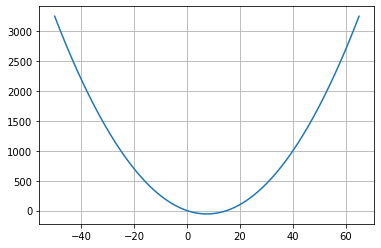

In [13]:
plot_function(f)

In [19]:
Quasi_newton(f,Df, DDf, 100)

no of iteration is:  1
X minimum is:  7.5


In [ ]:
p1 = np.array([[2,5],[1,2]]) ; y1 = np.array([21,8])
p2 = np.array([[1,1,1], [4,3,-1],[3,5,3]], dtype= np.float32); y2 = np.array([1,6,4])
p3 = np.array([[5,-2,3], [-3,9,1],[2,-1,-7]], dtype= np.float32) ; y3 = np.array([-1,2,3])

In [ ]:
# ## test cell for LU solve  result should be [-1.,  2.,  2.]
# A = np.array([[2,4,-2], [4,9,-3],[-2,-3,7]]) ; y = np.array([2,8,10])
# solve_system(A, y )

array([-1.,  2.,  2.])

In [ ]:
# reshaping matrix for jacobi 
# p3 = np.column_stack((p3, y3))

# for i in range(p3.shape[0]):
#     p3[i] = p3[i] / -p3[i,i]
#     p3[i,i] = 0
#     p3[i,-1] = p3[i,-1] * -1
# p3

In [ ]:
## test cell for jacobi and gauss sidel method result should be result should be [1, 2, -1 ,1] becareful add the extra dim in the for loop below 
# p3 = np.array([[0, 1/10, -1/5, 0 , 3/5], [1/11, 0, 1/11, -3/11, 25/11], [-1/5, 1/10, 0, 1/10, -11/10],[0,-3/8, 1/8, 0, 15/8] ])
# p3

In [113]:
# solving all assignment problems with LU to check
for i, j in zip([p1,p2,p3], [y1,y2,y3]):
    print(solve_system(i,j))

[-2.  5.]
[ 1.   0.5 -0.5]
[ 0.18611987  0.33123028 -0.42271293]


In [217]:
# problem p3 jacobi and gauss sidel
p33 = np.column_stack((p3, y3))

for i in range(p3.shape[0]):
    p33[i] = p33[i] / -p33[i,i]
    p33[i,i] = 0
    p33[i,-1] = p33[i,-1] * -1
# p33

j_sol , j_n = Jacobi(p33)
g_sol , g_n = Gauss_sidel(p33)
lu_sol = solve_system(p3, y3)

print('jacobi solution: ', j_sol, ' and n iteration is: ', j_n)

print('gauss sidel solution: ', g_sol, ' and n iteration is: ', g_n)

print('LU method solution is: ', lu_sol)

jacobi solution:  [ 0.18605365  0.33129176 -0.4226442 ]  and n iteration is:  7
gauss sidel solution:  [ 0.18606088  0.33120155 -0.42272568]  and n iteration is:  5
LU method solution is:  [ 0.18611987  0.33123028 -0.42271293]


In [17]:
# A = np.array([[-4,14,0],
#               [-5,13,0],
#               [-1,0,2]])
A = np.array([[0, 2], 
              [2, 3]])

In [18]:
power_method(A)

n iterations:  9


(array([[2.        ],
        [3.99999682]]),
 array([3.99999682]))

In [16]:
dig = np.array([2,3,4])
np.diag(dig)

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

In [3]:
l = list(map(int,input().split()))

In [5]:
' '.join(map(str,l))

'22 11'

In [25]:
lanuch = list(map(int,input().split()))
hit_time = list(map(int,input().split()))
out = [lanuch[0] + hit_time[0], lanuch[1]+hit_time[1]]
    # print('******')
if out[1] >= 60:
    out[0] = out[0] + 1
    out[1] = out[1] - 60
if out[0] > 23 :
    out[0] = out[0] - 24
print(out)
# l_out = list(map(str,out))
# for i in range(len(l_out)):
#     if len(l_out[i]) <2:
#         l_out[i] = '0'+l_out[i] 
# print(' '.join(l_out))
print(f'{out[0]:02d}',f'{out[1]:02d}', sep = ' ')

[0, 0]
00 00


In [32]:
T = int(input())
print(T)
for i in range(T):
    N = int(input())
    print(N)
    G = list(map(int,input().split()))
    print(G)
    G.sort()
    print(sum(G[:N]))

2
3
[8]
8
5
[3]
3
